In [668]:
import pandas as pd
import seaborn as sns

### Load Data

In [669]:
train = pd.read_csv("train.csv", index_col = "PassengerId")


In [670]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [671]:
train.shape

(891, 11)

In [672]:
test = pd.read_csv("test.csv", index_col = "PassengerId")
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [673]:
test.shape

(418, 10)


### Preprocessing

### Encoding

In [674]:


train["Sex_encode"] = train["Sex"].replace("male",0).replace("female",1)
print(train.shape)
train[["Sex","Sex_encode"]].head(2)

(891, 12)


,Sex,Sex_encode
PassengerId,,
1,male,0
2,female,1


In [675]:
test["Sex_encode"] = test["Sex"].replace("male",0).replace("female",1)

In [676]:
test[["Sex","Sex_encode"]].head(2)
train["Embarked"] = train["Embarked"].fillna("S")
train[train["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,





### Filling Missing Fare

In [677]:
train[train["Fare"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [678]:
test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0


In [679]:
test["Fare"] = test["Fare"].fillna(0)

test[test["Fare"].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


### Encode Embarked

In [680]:
train["Embarked_C"] = train["Embarked"] == "C"
train["Embarked_S"] = train["Embarked"] == "S"
train["Embarked_Q"] = train["Embarked"] == "Q"

train[["Embarked","Embarked_C","Embarked_S","Embarked_Q"]]

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
1,S,False,True,False
2,C,True,False,False
3,S,False,True,False
4,S,False,True,False
5,S,False,True,False
...,...,...,...,...
887,S,False,True,False
888,S,False,True,False
889,S,False,True,False


In [681]:
test["Embarked_C"] = test["Embarked"] == "C"
test["Embarked_S"] = test["Embarked"] == "S"
test["Embarked_Q"] = test["Embarked"] == "Q"

test[["Embarked","Embarked_C","Embarked_S","Embarked_Q"]]

,Embarked,Embarked_C,Embarked_S,Embarked_Q
PassengerId,,,,
892,Q,False,False,True
893,S,False,True,False
894,Q,False,False,True
895,S,False,True,False
896,S,False,True,False
...,...,...,...,...
1305,S,False,True,False
1306,C,True,False,False
1307,S,False,True,False


### filling Age

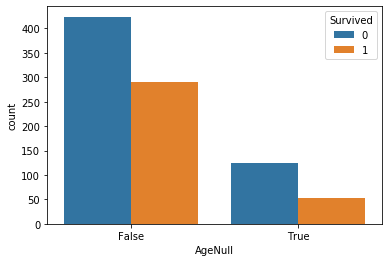

In [682]:
train["AgeNull"] = train["Age"].isnull()
sns.countplot(data = train, x = "AgeNull",hue = "Survived")

In [683]:
# 나이가 Null이면 죽는 사람이 더 많기 때문에 Age가 Null인 사람에게 80을 할당했다. -> Age == 80 => 무조건 죽는다고 판단함.
train.loc[(train["Age"].isnull()) & (train["Pclass"] == 1), "Age"] = 80
train.loc[(train["Age"].isnull()) & (train["Pclass"] == 2), "Age"] = 80
train.loc[(train["Age"].isnull()) & (train["Pclass"] == 3), "Age"] = 80

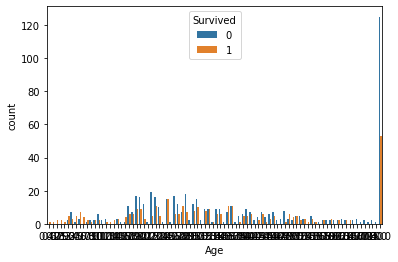

In [684]:
test.loc[(test["Age"].isnull()) & (test["Pclass"] == 1), "Age"] = 80
test.loc[(test["Age"].isnull()) & (test["Pclass"] == 2), "Age"] = 80
test.loc[(test["Age"].isnull()) & (test["Pclass"] == 3), "Age"] = 80

sns.countplot(data = train, x = "Age",hue="Survived")

### Explore Data

In [685]:
train["AgeUnder15"] = train["Age"] <= 15
test["AgeUnder15"] = test["Age"] <= 15



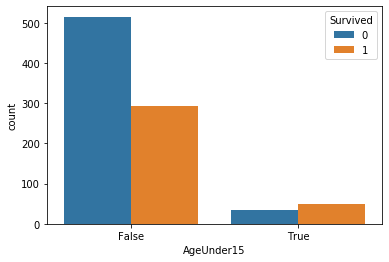

In [686]:
sns.countplot(data = train, x = "AgeUnder15", hue="Survived")

In [687]:
train.loc[train["Age"] < 15,"Age Type"] = "Young"
train.loc[(15 <= train["Age"]) & (train["Age"]< 30),"Age Type"] = "Medium"
train.loc[30 <= train["Age"],"Age Type"] = "Old"

test.loc[test["Age"] < 15,"Age Type"] = "Young"
test.loc[(15 <= test["Age"]) & (test["Age"]< 30),"Age Type"] = "Medium"
test.loc[30 <= test["Age"],"Age Type"] = "Old"

train["AgeYoung"] = train["Age Type"] == "Young"
train["AgeMedium"] = train["Age Type"] == "Medium"
train["AgeOld"] = train["Age Type"] == "Old"

test["AgeYoung"] = test["Age Type"] == "Young"
test["AgeMedium"] = test["Age Type"] == "Medium"
test["AgeOld"] = test["Age Type"] == "Old"

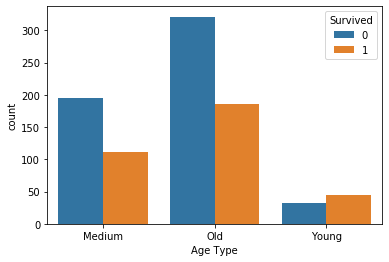

In [688]:
sns.countplot(data = train, x = "Age Type", hue = "Survived")

In [689]:
# AgeUnder15(Young)만이 의미있는 Column일것이라고 생각함.

In [690]:
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]

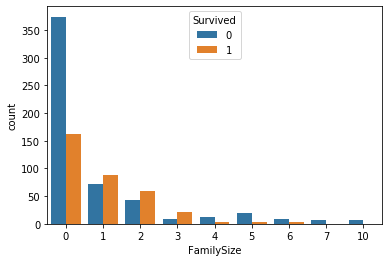

In [691]:
sns.countplot(data = train, x = "FamilySize", hue = "Survived")

In [692]:
# FamilySize in [1,2,3]일 경우만 생존한다고 생각.
# FamilySize == [1,2,3]을 "Nuclear"라고 생각함. 나머지는 다 죽는 것으로 판단함.

In [693]:
train["Nuclear"] = (train["FamilySize"] >= 1) & (train["FamilySize"] <= 3)
test["Nuclear"] = (test["FamilySize"] >= 1) & (test["FamilySize"] <= 3)
train["FamilySize"] = train["SibSp"] + train["Parch"]
test["FamilySize"] = test["SibSp"] + test["Parch"]
train["Single"] = train["FamilySize"] == 0
test["Single"] = test["FamilySize"] == 0
train["Big"] = train["FamilySize"] >= 4
test["Big"] = test["FamilySize"] >= 4
test[test["Single"].isnull()]
train["Nuclear"] = (train["FamilySize"] >= 1) & (train["FamilySize"] <= 3)
test["Nuclear"] = (test["FamilySize"] >= 1) & (test["FamilySize"] <= 3)
train.head()
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeNull,AgeUnder15,Age Type,AgeYoung,AgeMedium,AgeOld,FamilySize,Nuclear,Single,Big
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,False,Medium,False,True,False,1,True,False,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,Old,False,False,True,1,True,False,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,False,False,Medium,False,True,False,0,False,True,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,False,False,Old,False,False,True,1,True,False,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,False,False,Old,False,False,True,0,False,True,False


In [694]:
# Name에서 성만 분리해서 파악하기

In [695]:
nameList = list(train["Name"])
len(nameList)
nameList1 = list(test["Name"])
len(nameList1)

418

In [696]:
nameDict = {}
names = []
raw_names = []

titleList = []
titleList1 = []
for i in nameList:
    temp = i.split(",")
    if temp[1].find("Mr.") >= 0:
        titleList.append(True)
    else:
        titleList.append(False)
    raw_names.append(temp[0])
    if temp[0] not in nameDict:
        nameDict[temp[0]] = 1
    else:
        nameDict[temp[0]] += 1
nameDict
nameDict1 = {}
names1 = []
raw_names1 = []
for i in nameList1:
    temp = i.split(",")
    raw_names1.append(temp[0])
    if temp[1].find("Mr.") >= 0:
        titleList1.append(True)
    else:
        titleList1.append(False)
    if temp[0] not in nameDict1:
        nameDict1[temp[0]] = 1
    else:
        nameDict1[temp[0]] += 1

In [697]:
# Single이 아닌 사람들을 names(train.csv의 경우), names1(test.csv의 경우) list에 append시킴
for key, value in nameDict.items():
    if value > 1 :
        names.append(key)
for key, value in nameDict1.items():
    if value > 1 :
        names1.append(key)

In [698]:
len(names1)

53

In [699]:
train["Name_new"] = raw_names
test["Name_new"] = raw_names1

In [700]:
train["FamilyName"] = train["Name_new"].isin(names)
test["FamilyName"] = test["Name_new"].isin(names1)

###### 데이터를 이용해서 같은 성을 가진 사람들의 Survived 값이 어떻게 되는지를 표본 몇개를 추출해서 검사해봄.

In [701]:
train[(train["Name_new"].isin(names)) & (train["Name_new"] == "Andersson")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age Type,AgeYoung,AgeMedium,AgeOld,FamilySize,Nuclear,Single,Big,Name_new,FamilyName
PassengerId,,,,,,,,,,,,,,,,,,,,,
14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,...,Old,False,False,True,6,False,False,True,Andersson,True
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,...,Medium,False,True,False,6,False,False,True,Andersson,True
120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.0,4,2,347082,31.2750,NaN,...,Young,True,False,False,6,False,False,True,Andersson,True
147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,...,Medium,False,True,False,0,False,True,False,Andersson,True
542,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,347082,31.2750,NaN,...,Young,True,False,False,6,False,False,True,Andersson,True
543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,...,Young,True,False,False,6,False,False,True,Andersson,True
611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,...,Old,False,False,True,6,False,False,True,Andersson,True
814,0,3,"Andersson, Miss. Ebba Iris Alfrida",female,6.0,4,2,347082,31.2750,NaN,...,Young,True,False,False,6,False,False,True,Andersson,True
851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,...,Young,True,False,False,6,False,False,True,Andersson,True


In [702]:
train[(train["Name_new"].isin(names)) & (train["Name_new"] == "Asplund")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age Type,AgeYoung,AgeMedium,AgeOld,FamilySize,Nuclear,Single,Big,Name_new,FamilyName
PassengerId,,,,,,,,,,,,,,,,,,,,,
26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,...,Old,False,False,True,6,False,False,True,Asplund,True
183,0,3,"Asplund, Master. Clarence Gustaf Hugo",male,9.0,4,2,347077,31.3875,NaN,...,Young,True,False,False,6,False,False,True,Asplund,True
234,1,3,"Asplund, Miss. Lillian Gertrud",female,5.0,4,2,347077,31.3875,NaN,...,Young,True,False,False,6,False,False,True,Asplund,True
262,1,3,"Asplund, Master. Edvin Rojj Felix",male,3.0,4,2,347077,31.3875,NaN,...,Young,True,False,False,6,False,False,True,Asplund,True


In [703]:
train[(train["Name_new"].isin(names)) & (train["Name_new"] == "Ryerson")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age Type,AgeYoung,AgeMedium,AgeOld,FamilySize,Nuclear,Single,Big,Name_new,FamilyName
PassengerId,,,,,,,,,,,,,,,,,,,,,
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,...,Medium,False,True,False,4,False,False,True,Ryerson,True
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,...,Medium,False,True,False,4,False,False,True,Ryerson,True


In [704]:
train[(train["Name_new"].isin(names)) & (train["Name_new"] == "Davies")]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Age Type,AgeYoung,AgeMedium,AgeOld,FamilySize,Nuclear,Single,Big,Name_new,FamilyName
PassengerId,,,,,,,,,,,,,,,,,,,,,
386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.50,NaN,...,Medium,False,True,False,0,False,True,False,Davies,True
550,1,2,"Davies, Master. John Morgan Jr",male,8.0,1,1,C.A. 33112,36.75,NaN,...,Young,True,False,False,2,True,False,False,Davies,True
566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.15,NaN,...,Medium,False,True,False,2,True,False,False,Davies,True


In [705]:
## 살펴보니 가족끼리는 같이 죽거나 같이 사는 듯함.
## 가족이 있는 사람들의 성을 나타내는 "FamilyName"열을 train에 사용해도 좋을 듯함.

In [706]:
train["Title"] = titleList
test["Title"] = titleList1

In [707]:
train.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeYoung,AgeMedium,AgeOld,FamilySize,Nuclear,Single,Big,Name_new,FamilyName,Title
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,False,True,False,1,True,False,False,Braund,True,True
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,False,False,True,1,True,False,False,Cumings,False,False


In [708]:

# Cabin값에 따라서도 달라질 수 있을 듯함. -> Cabin의 맨 앞의 알파벳만 가져와서 판단
# NaN값은 Cabin값에 없는 Z를 할당해 처리할 것.

In [709]:
train["Cabin"] = train["Cabin"].fillna("Z")
test["Cabin"] = test["Cabin"].fillna("Z")
list(train["Cabin"])
list(test["Cabin"])
CabinDict = {}
CabinList = []
CabinDict1 = {}
CabinList1 = []
for i in list(train["Cabin"]):
    CabinList.append(i[0])
    if i[0] not in CabinDict:
        CabinDict[i[0]] = 1
    else:
        CabinDict[i[0]] += 1
for i in list(test["Cabin"]):
    CabinList1.append(i[0])
    if i[0] not in CabinDict1:
        CabinDict1[i[0]] = 1
    else:
        CabinDict1[i[0]] += 1

In [710]:
CabinDict # NaN 값이 많이 있긴 함..

{'Z': 687,
 'C': 59,
 'E': 32,
 'G': 4,
 'D': 33,
 'A': 15,
 'B': 47,
 'F': 13,
 'T': 1}

In [711]:
train["CabinNew"] = CabinList
test["CabinNew"] = CabinList1

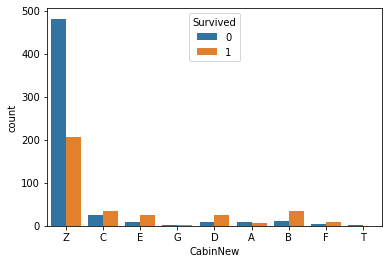

In [712]:
sns.countplot(data = train, x = "CabinNew",hue="Survived")

In [713]:
## 그럼에도 CEFDB의 경우에는 유의미한 값이 나올 듯함.

In [714]:
train["CabinSur"] = train["CabinNew"].isin(["C","E","D","B","F","G"])
test["CabinSur"] = test["CabinNew"].isin(["C","E","D","B","F","G"])

In [715]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,AgeOld,FamilySize,Nuclear,Single,Big,Name_new,FamilyName,Title,CabinNew,CabinSur
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Z,...,False,1,True,False,False,Braund,True,True,Z,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,True,1,True,False,False,Cumings,False,False,C,True
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Z,...,False,0,False,True,False,Heikkinen,False,False,Z,False
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,True,1,True,False,False,Futrelle,True,False,C,True
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Z,...,True,0,False,True,False,Allen,True,True,Z,False


In [716]:
train["Fare100"] = train["Fare"] > 100
test["Fare100"] = test["Fare"] > 100

In [717]:

train.columns
train[train["Embarked"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,FamilySize,Nuclear,Single,Big,Name_new,FamilyName,Title,CabinNew,CabinSur,Fare100
PassengerId,,,,,,,,,,,,,,,,,,,,,


In [718]:
train["Pclass3"] = (train["Pclass"] == 3)
test["Pclass3"] = (test["Pclass"] == 3)

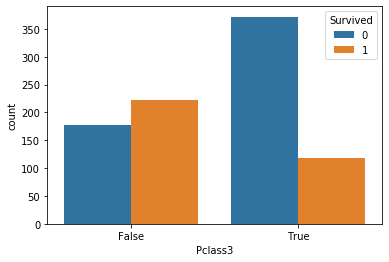

In [719]:
sns.countplot(data = train, x = "Pclass3" , hue="Survived")

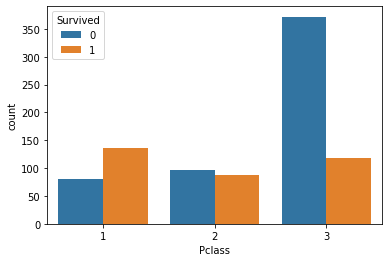

In [720]:
sns.countplot(data = train, x = "Pclass" , hue="Survived")

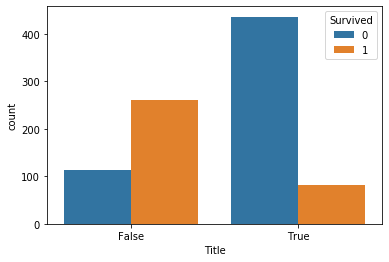

In [721]:
sns.countplot(data = train, x = "Title",hue="Survived")

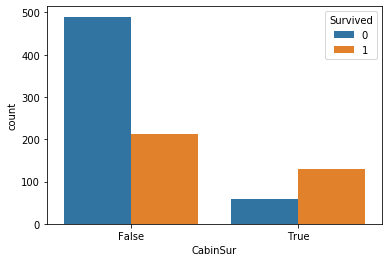

In [722]:
sns.countplot(data = train,x = "CabinSur", hue="Survived")

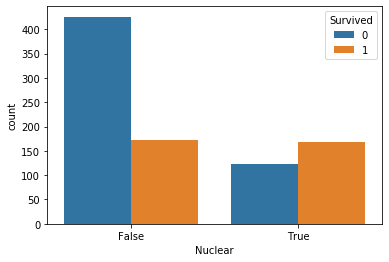

In [723]:
sns.countplot(data = train, x = "Nuclear", hue="Survived")

In [724]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_S',
       'Embarked_Q', 'AgeNull', 'AgeUnder15', 'Age Type', 'AgeYoung',
       'AgeMedium', 'AgeOld', 'FamilySize', 'Nuclear', 'Single', 'Big',
       'Name_new', 'FamilyName', 'Title', 'CabinNew', 'CabinSur', 'Fare100',
       'Pclass3'],
      dtype='object')

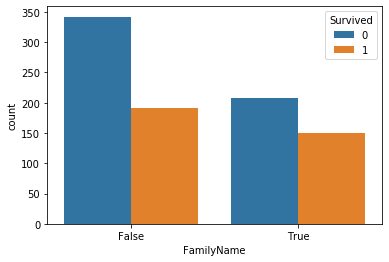

In [725]:
sns.countplot(data = train, x = "FamilyName",hue="Survived")

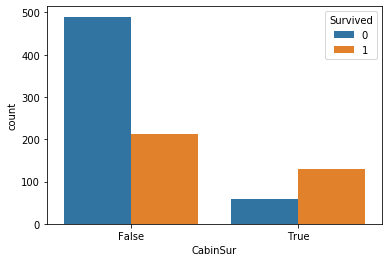

In [726]:
sns.countplot(data = train , x = "CabinSur" , hue = "Survived")

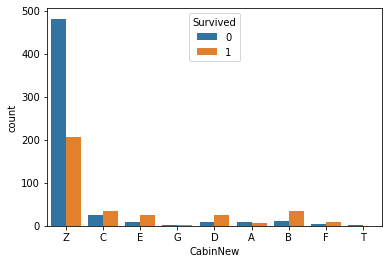

In [727]:
sns.countplot(data = train, x = "CabinNew",hue="Survived")

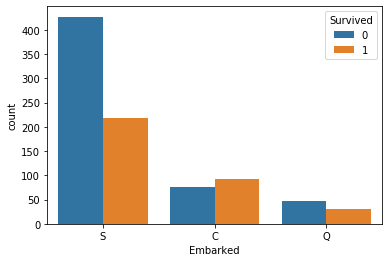

In [728]:
sns.countplot(data = train, x = "Embarked", hue="Survived")

In [729]:
train["EmbarkedNew"] = train["Embarked"] == "C"
test["EmbarkedNew"] = test["Embarked"] == "C"

### Train

In [730]:
feature_names = ["Sex_encode","EmbarkedNew","Pclass3","CabinSur","Nuclear","Title"]

In [731]:
x_train = train[feature_names]
print(x_train.shape)
x_train.head()

(891, 6)


,Sex_encode,EmbarkedNew,Pclass3,CabinSur,Nuclear,Title
PassengerId,,,,,,
1,0,False,True,False,True,True
2,1,True,False,True,True,False
3,1,False,True,False,False,False
4,1,False,False,True,True,False
5,0,False,True,False,False,True


In [732]:
x_test = test[feature_names]

In [733]:
x_test.shape

(418, 6)

In [734]:
x_test.head()

,Sex_encode,EmbarkedNew,Pclass3,CabinSur,Nuclear,Title
PassengerId,,,,,,
892,0,False,True,False,False,True
893,1,False,True,False,True,False
894,0,False,False,False,False,True
895,0,False,True,False,False,True
896,1,False,True,False,True,False


In [735]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head(2)

(891,)


PassengerId
1    0
2    1
Name: Survived, dtype: int64

### Use Decision Tree

In [736]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [737]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [738]:
prediction = model.predict(x_test)

print(prediction.shape)
prediction[:5]

(418,)


array([0, 1, 0, 0, 1], dtype=int64)

### Submit

In [739]:
submit = pd.read_csv("gender_submission.csv", index_col = "PassengerId")

In [740]:
submit

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [741]:
submit["Survived"] = prediction


In [742]:
print(submit.shape)
submit

(418, 1)


,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [743]:
submit.to_csv("decision-tree2.csv")

In [172]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_S',
       'Embarked_Q', 'AgeNull', 'AgeUnder15', 'Age Type', 'AgeYoung',
       'AgeMedium', 'AgeOld', 'FamilySize', 'Nuclear', 'Single', 'Big',
       'Name_new', 'FamilyName', 'CabinNew', 'CabinSur', 'Fare100'],
      dtype='object')

In [180]:
temp = train[["Survived","Pclass","Embarked_C","Embarked_S","Embarked_Q","Sex_encode","AgeYoung","FamilySize","FamilyName","CabinSur","Nuclear","Age","Fare","Fare100"]]

In [181]:
temp.corr()

,Survived,Pclass,Embarked_C,Embarked_S,Embarked_Q,Sex_encode,AgeYoung,FamilySize,FamilyName,CabinSur,Nuclear,Age,Fare,Fare100
Survived,1.000000,-0.338481,0.168240,-0.149683,0.003650,0.543351,0.122978,0.016639,0.061081,0.321487,0.279855,-0.115332,0.257307,0.182033
Pclass,-0.338481,1.000000,-0.243292,0.074053,0.221009,-0.131900,0.118457,0.065997,0.015938,-0.678209,-0.223551,-0.034924,-0.549500,-0.393856
Embarked_C,0.168240,-0.243292,1.000000,-0.782742,-0.148258,0.082853,0.002974,-0.046215,-0.007689,0.186723,0.158586,0.045332,0.269335,0.230569
Embarked_S,-0.149683,0.074053,-0.782742,1.000000,-0.499421,-0.119224,0.021770,0.077359,0.016235,-0.088129,-0.084120,-0.213209,-0.162184,-0.153313
Embarked_Q,0.003650,0.221009,-0.148258,-0.499421,1.000000,0.074115,-0.038734,-0.058592,-0.015095,-0.119892,-0.087093,0.275696,-0.117216,-0.077348
Sex_encode,0.543351,-0.131900,0.082853,-0.119224,0.074115,1.000000,0.095692,0.200988,0.159114,0.171278,0.260747,-0.092086,0.182333,0.152189
AgeYoung,0.122978,0.118457,0.002974,0.021770,-0.038734,0.095692,1.000000,0.429578,0.297788,-0.053120,0.172907,-0.438857,-0.003117,-0.010740
FamilySize,0.016639,0.065997,-0.046215,0.077359,-0.058592,0.200988,0.429578,1.000000,0.544058,0.008418,0.278553,-0.176235,0.217138,0.100212
FamilyName,0.061081,0.015938,-0.007689,0.016235,-0.015095,0.159114,0.297788,0.544058,1.000000,0.054299,0.463561,-0.158310,0.134850,0.084865
CabinSur,0.321487,-0.678209,0.186723,-0.088129,-0.119892,0.171278,-0.053120,0.008418,0.054299,1.000000,0.230826,-0.015715,0.490076,0.370017


In [317]:
pd.pivot_table(train, index = ["CabinSur","Nuclear","AgeYoung"], values= "Survived", aggfunc="sum")

Survived
CabinSur Nuclear AgeYoung          
False    False   False          114
                 True             4
         True    False           63
                 True            32
True     False   False           55
         True    False           65
                 True             9

In [388]:
train["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
                             ...                        
887                                Montvila, Rev. Juozas
888                         Graham, Miss. Margaret Edith
889             Johnston, Miss. Catherine Helen "Carrie"
890                                Behr, Mr. Karl Howell
891                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

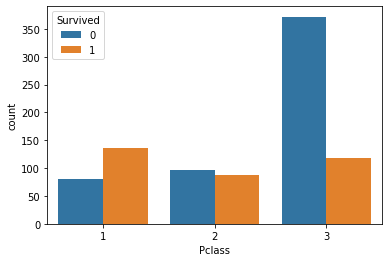

In [525]:
sns.countplot(data = train, x = "Pclass",hue = "Survived")